# Section 2.1 — Discrete random variables

This notebook contains all the code examples from [Section 2.1 Discrete random variables]() of the **No Bullshit Guide to Statistics**.

Topics covered in this notebook:

- Definitions of discrete random variables
- Examples of random variables
- Probability calculations
- Computer models for random variables 
  - Overview of `scipy.stats.distributions` methods
- Real-world example to demo probability applications
- Discussion
  - Bulk and tails of a distribution


#### Notebook setup

We'll start by importing the Python modules we need for this notebook.

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
np.random.seed(3)

## Definitions


### Random variables

- *random variable* $X$:
  a quantity that can take on different values
- *outcome*: a particular value $\{X = x\}$ or range of values $\{a \leq X \leq b\}$ that can occur as a result of observing the random variable $X$
- *sample space* $\mathcal{X}$: describes the set of all possible outcomes of the random variable.
- $f_X$: the *probability mass function*
  is a function that assigns probabilities to the different outcome
  in the sample space of a discrete random variable.
  The probability mass function of the random variable $X$
  is a function of the form $f_X: \mathcal{X} \to [0,1]$.
- $F_X$:
  the *cumulative distribution function* (CDF) tells us the probability of an outcome
  less than or equal to a given value: $F_X(b) = Pr(\{ X \leq b \})$.
- $\mathbb{E}_X[w(X)]$:
  the *expected value* of the function $w(X)$
  computes the average value of $w(X)$ computed for all the possible values of the random variable $X$.





#### Example 1: coin flip

Consider the random variable $C$ that describes the outcome of a coin flip for a balanced (fair) coin.
The sample space for the random variable $C$ is $\{\texttt{heads}, \texttt{tails}\}$.

The probability mass function is
$$
    f_C(\texttt{heads}) = 0.5
    \quad
    \textrm{and}
    \quad
    f_C(\texttt{tails}) = 0.5.
$$

In [4]:
# define the probability mass function for the random variable C
def fC(c):
    if c in {"heads", "tails"}:
        return 1/2
    else:
        return 0

In [5]:
# print the values of the probability mass function
for c in ["heads", "tails"]:
    print(c, fC(c))

heads 0.5
tails 0.5


#### Example 2: rolling a six-sided die

The random outcome that occurs when we roll a six-sided die can be described as a random variable $D$
which has the sample space $\{1, 2, 3, 4, 5, 6\}$.
If we assume the die is fair,
then each of the outcomes will have equal weight,
so the probability mass function $f_D$ has the following values:

$$
    f_D(1)\!=\!\tfrac{1}{6},
    \ 
    f_D(2)\!=\!\tfrac{1}{6},
    \ 
    f_D(3)\!=\!\tfrac{1}{6},
    \ 
    f_D(4)\!=\!\tfrac{1}{6},
    \ 
    f_D(5)\!=\!\tfrac{1}{6},
    \ 
    f_D(6)\!=\!\tfrac{1}{6}.
$$

In [6]:
# define the probability mass function for the random variable D
def fD(d):
    if d in {1,2,3,4,5,6}:
        return 1/6
    else:
        return 0

In [7]:
# print the values of probability mass function
for d in range(1,6+1):
    print(d, fD(d))

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


Note the Python function `range(a,b)` is equivalent to the list of values `[a,a+1,a+2,...,b-1]` and does not include the upper limit `b`.
If we want to have a range of values that includes `b` we use
`range(a,b+1)` which produces `[a,a+1,a+2,...,b-1,b]`.
You'll see this `+1` added in numerous code examples below.

#### Example 3: hard disk failures

We can model the number of hard disk failures expected to occur in a given data centre as a random variable $H$ distributed according to the Poisson distribution.
$$
    f_H(h) = \frac{\lambda^{h}e^{-\lambda }}{h!}, \ \ \textrm{for }  h \in \{0, 1, 2, 3, \ldots \},
$$

where $\lambda$ is a parameter of the distribution.

In this example, we know parameter is $\lambda = 20$,
which we'll denote as `lam = 20` in Python.

The probability mass function for the random variable $H \sim \textrm{Pois}(\lambda=20)$ is computed using the following Python function `fH`.

In [8]:
import numpy as np

def fH(h):
    lam = 20
    return lam**h * np.exp(-lam) / np.math.factorial(h)

We can use the function `fH` to compute the probability of simple outcomes like $\{H=23\}$.

In [9]:
fH(23)

0.06688147366240181

The probability of a composite outcome is the sum of the probabilities of the individual elements.
To compute the probability of the composite outcome $\{18 \leq H \leq 22\}$,
we use the following Python expression:

In [10]:
sum([fH(h) for h in range(18,22+1)])

0.42358294520135187

The code below verifies that the Python function `fH` satisfies Kolmogorov's second axiom,
which demands that the total probability is $1$.

In [11]:
sum([fH(h) for h in range(0,100+1)])

1.0

Note we calculated the summation only until $h=100$ and not until $h=\infty$.
In general,
it's it's not possible to do summation until infinity on computers.
Stopping the summation at $h=100$ is okay in this case,
because the probability values $f_H(101)$, $f_H(102)$, etc. are very small numbers,
`fH(101) = 5.544e-38` which is a negligible number,
when added to the answer `1.0`.

In [12]:
1.0 + fH(101)

1.0

## Calculations with random variables

### Example 4: expected winnings from the die game


In [13]:
def w(d):
    if d == 6:
        return 5
    else:
        return 0

In [14]:
# expected value of w(D)
sum([w(d)*fD(d) for d in range(1,6+1)])

0.8333333333333333

### Example 5: mean and variance of six-sided die


#### Mean

The formula for the mean is given by:
$$
  \mu_D \ = \ \mathbb{E}_D[D] = \sum_{d=1}^{6}  d \cdot f_{D}(d).
$$

In code, this gives:

In [15]:
sum([d*fD(d) for d in range(1,6+1)])

3.5

So the mean is $\mu_D = \frac{21}{6} = 3.5$.

#### Variance

The formula for the variance is
$$
    \sigma_D^2
        = \mathbb{E}_D\!\left[ (D-\mu_D)^2 \right]
        = \sum_{d=1}^{6} \; (d-3.5)^2 \cdot f_D(d).
$$

In [16]:
sum([(d-3.5)**2 * fD(d) for d in range(1,7)])

2.9166666666666665

So the variance of $D$ is $\sigma_D^2 = 2.91\overline{6}$.

We can compute the standard deviation $\sigma_D$ by taking the square root of the variance.

In [17]:
import numpy as np
np.sqrt(2.9166666666666665)

1.707825127659933

### Example 6: mean and variance of hard disks failures


#### Mean

The formula for the mean is given by:
$$
  \mu_H \ = \ \mathbb{E}_H[H] = \sum_{h=0}^{\infty}  h \cdot f_{H}(h).
$$

In code, we'll use the upper limit of $h=100$ instead of $h$ all the way to infinity.

In [18]:
sum([h*fH(h) for h in range(0,100+1)])

20.0

So the mean is $\mu_H = 20.0$.
Indeed, this is what we expect since we constructed this random variable with mean parameters $\lambda=20$.

#### Variance

The formula for the variance is
$$
    \sigma_H^2
        = \mathbb{E}_H\!\left[ (H-\mu_H)^2 \right]
        = \sum_{h=0}^{\infty} (h-20)^2 \cdot f_H(h).
$$

In [19]:
sum([(h-20)**2 * fH(h) for h in range(0,100)])

19.999999999999996

Due to numerical rounding errors in the above computation, we end up with a number that differs (in the 15th decimal) from the correct answer $20$.
The variance of $H$ is $\sigma_H^2 = 20.0$.

We can compute the standard deviation $\sigma_H$ by taking the square root of the variance.

In [20]:
import numpy as np
np.sqrt(20)

4.47213595499958

Intuitively, the $\sigma_H$ tells us the width of distribution is approximately 5,
and the most likely outcomes will be in the interval
$[\mu_H - \sigma_H, \mu_H + \sigma_H] = [15, 25]$.

<a name="computer_models"></a>

## Computer models for random variables

- `<model>`: the family of probability distributions
  - Examples: `randint`, `poisson`, `uniform`, `norm`, etc.
- `<params>`: parameters of the model—specific value of the control knobs we choose to create a particular distribution
  - Examples: `alpha`,`beta`,`lam`, `mu`, `sigma`, etc.
- `<model>(<params>)`: the probability model from the family `<model>` initialized with parameters `<params>`
- $\sim$: math shorthand symbol that stands for "is distributed according to."
  For example $X \sim \mathcal{M}(\theta)$ means the random variable $X$
  is distributed according to the probability model $\mathcal{M}$ with parameters $\theta$.


### Examples of probability models and their computer implementations

- The discrete uniform family of distribution $\mathcal{U}_d(\alpha,\beta)$
  assigns equal probabilities to all outcomes in the range $[\alpha, \alpha+1, \ldots, \beta]$.
  To create a computer model for a discrete uniform distribution,
  use the code `randint(alpha, beta+1)`,
  where `alpha` and `beta` are two integers.
  - Examples 2: we can model the outcome of a six-sided die roll $D \sim \mathcal{U}_d(1,6)$ as `rvD = randint(1,6+1)`.
- The Poisson family of distribution $\textrm{Pois}(\lambda)$
  describes the count of occurrences when the average rate is $\lambda$.
  To create a computer model for a Poisson random variable
  use the code `poisson(lam)`,
  where `lam` (short for *lambda*) describes the expected number of occurrences.
  - Examples 3: we can model the number of hard disk failures $H \sim \textrm{Pois}(20)$ as `rvH = poisson(20)`.
- The continuous uniform family of distribution $\mathcal{U}(\alpha,\beta)$,
  which assigns equal probabilities to all outcomes in the interval $[\alpha,\beta]$.
  To create a computer model for a continuous uniform distribution,
  use the code `uniform(alpha, beta)`,
  where `alpha` and `beta` are two floats.
- The normal family of distribution $\mathcal{N}(\mu,\sigma)$ corresponds to
  a bell-shaped curve centred at $\mu$ whose width is proportional to $\sigma$.
  To create a computer model for a normal random variable
  use the code `norm(mu, sigma)`,
  where `mu` is the mean and `sigma` is the standard deviation.


## Hard disks example

Let's now work through a detailed example to show how the computer model for the Poisson variable
can help us do all kinds of computations with relevance to the real-world.

The first thing we'll do is import the `poisson` model from `scipy.stats.distributions` 
and create a random variable object `rvH` by initializing the Poisson model with parameter $\lambda = 20$.

In [21]:
# import the poisson model
from scipy.stats.distributions import poisson

# create a Poisson random variable with mean parameter 20
rvH = poisson(20)

The methods on the random variable object `rvH`' will allow you to do anything you might want to do with the random variable $H$, as we'll now see...

In [22]:
# what type of object is rvH?
type(rvH)

scipy.stats._distn_infrastructure.rv_frozen

The above line tells us some information about the internal implementation of the Python object `rvH`,
which is the Python implementation of the random variable $H \sim \textrm{Pois}(20)$.
The `rvH` object is an instance of the class `rv_frozen` (frozen random variable).
Ignore the frozen part. The key part is that it's a random variable.

### Compute probabilities of simple outcomes

In [23]:
rvH.pmf(20)

0.0888353173920848

In [24]:
rvH.pmf(21)

0.08460506418293791

In [25]:
rvH.pmf(22)

0.07691369471176195

### Properties of the distribution

In [26]:
rvH.mean()

20.0

In [27]:
rvH.std()

4.47213595499958

In [28]:
np.sqrt( rvH.var() )  # = rvH.std()

4.47213595499958

In [29]:
rvH.median()

20.0

In [30]:
# show the sample space the random variable
rvH.support()

(0, inf)

The concept of *support* (of a probability distribution) is a fancy math way to talk about "the interval of values where the probability distribution is non-zero." The above result tells us the support of the random variable `rvH` is all natural numbers $\{0,1,2,3,\ldots\}$.

### Computing probabilities of complex outcomes

Suppose you want to compute the probability of the outcome $\{ a \leq N \leq b \}$
for the random variable $H$.

In [31]:
# Pr({15 <= H <= 25}) = sum of f_H between 15 and 25
sum([rvH.pmf(x) for x in range(15, 25+1)])

0.782950746174042

In [32]:
# Pr({15 <= H <= 25}) = F_H(25) - F_H(14)
rvH.cdf(25) - rvH.cdf(14)

0.7829507461740455

### Plotting the probability mass function

We'll use the `stem` plot from the Matplotlib library to plot probability mass functions
for discrete random variables.

To create a stem-plot of the probability mass function $f_H$, we can use the following three step procedure:
1. create a range of inputs `hs` for the plot
2. compute the value of $f_H$ for each of the inputs and store in an array of values `fHs`
3. plot the values `fHs` using `plt.stem`

If you've never seen this three-step pattern used to generate plots in Python,
you should check out the [Python tutorial notebook](../tutorials/python_tutorial.ipynb),
in particular the section "Plotting function graphs".

<StemContainer object of 3 artists>

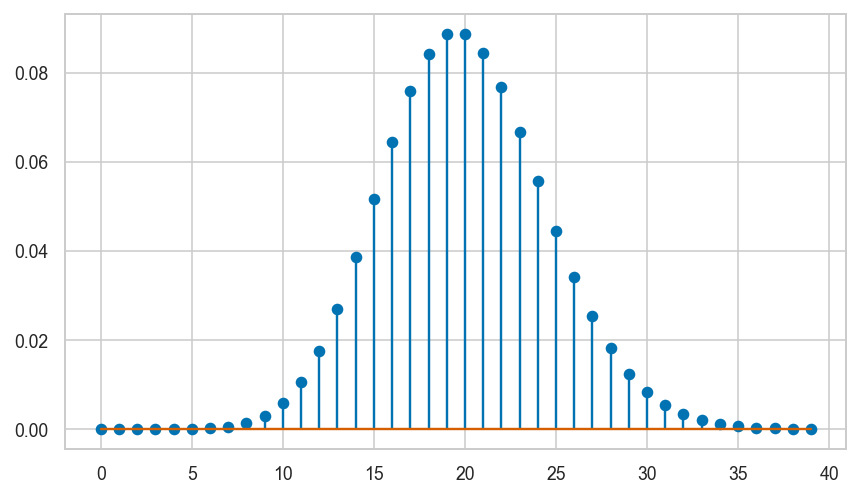

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# 1. array of input values for the plot
hs = np.arange(0, 40)

# 2. compute f_H(h) for each h in hs
fHs = rvH.pmf(hs)

# 3. stem plot please
plt.stem(fHs)

Note the graph of the probability mass function corresponds to a discrete set of points,
and is not defined for values in between the integers.
This makes sense,
since we can't have 20.3 hard disk failures—only integers are allowed.

### Computing quantiles

Let's try to find the smallest interval $[0, h_q]$ that contains at least proportion $q$ of the total probability.

For example, the $q=0.95$ quantile is located at...

In [34]:
# find value of h such that Pr({H <= h}) > 0.95
rvH.ppf(0.95)

28.0

In [35]:
# verify that Pr({H <= 28)}) > 0.95
rvH.cdf(28)

0.9656664781059899

Note by choosing $h=28$ we're overshooting the target 0.95 a little bit,
but this is often the case when working with discrete probability distributions.
The previous value at $h=27$ gives `rvH.cdf(27)` $=F_H(27) = 0.9475$,
which is less than 0.95, so we pick $h=28$ as the first value that satisfies $F_H(h) \geq 0.95$.

### Generating random observations

Let's say you want to generate $n=12$ observations from the random variable $H$.
You can do this by calling the method `rvH.rvs(12)`.

In [36]:
rvH.rvs(12)

array([21, 17, 14, 10, 22, 22, 17, 17, 19, 21, 17, 18])

### Computing expectations

Let's say we want to estimate of the total cost we should budget for replacement hard disks, given a base price of \\$200/disk and a bulk discount of \\$150/disk when buying 20 or more disks.

In [37]:
def cost(h):
    if h >= 20:
        return 150*h
    else:
        return 200*h

In [38]:
# expected cost of replacement
sum([cost(h)*rvH.pmf(h) for h in range(0,100+1)])

3381.4219494471417

Another option for computing the expected value is to use the method `rvH.expect()`.
If you try `rvH.expect(cost)` we get an error "*ValueError: The truth value of an array with more than one element is ambiguous.*" This happens because of the way NumPy tries to
evaluate the expression—it will pass in the entire vector of inputs `h` to the function,
and then the expression `h >= 20` causes a problem when `h` is a vector.

In [39]:
# doesn't work!
# rvH.expect(cost)

The code below shows how to convert the function `cost` to a vector-friendly equivalent function `vcost`, which we can ten use in the `rvH.expect` method.

In [40]:
vcost = np.vectorize(cost)
rvH.expect(vcost)

3381.4219494471427

#### Cumulative distribution function

The cumulative distribution is the sum of the probability mass function up to given value $b$:

$$
   F_H(b) = \textrm{Pr}(H \leq b) = \sum_{h=0}^{h=b} f_H(h).
$$


<AxesSubplot:>

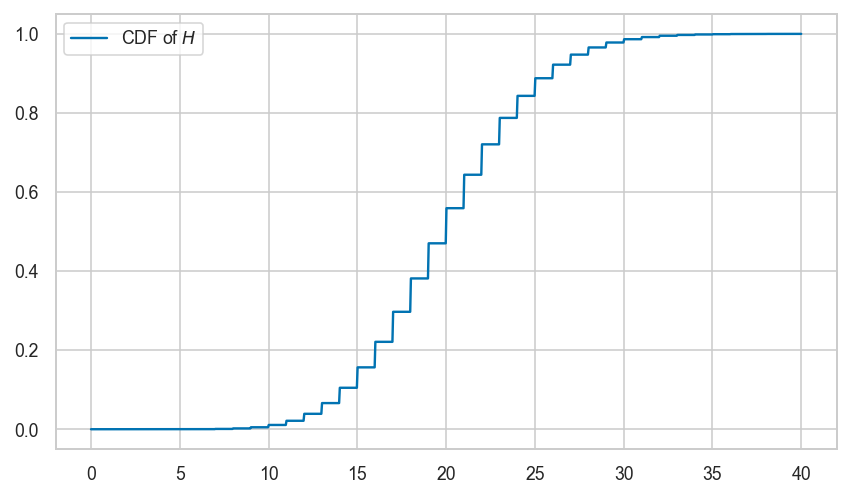

In [41]:
hs = np.linspace(0, 40, 1000)
FHs = rvH.cdf(hs)

sns.lineplot(x=hs, y=FHs, label="CDF of $H$")

## Discussion

### Bulk of the distribution

We want to find an interval `I_95` (a subset of the sample space) that contains 95% of the observations of the random variable $H$. 
In other words, we want to find the integers `a` and `b` such that 
$$
   \sum_{h=a}^{h=b} f_H(h) = f_H(a) + f_H(a+1) + \cdots + f_H(b) \geq 0.95. 
$$

We can obtain this interval by calling the `interval` method on the `rvH` object.

In [42]:
I_95 = rvH.interval(0.95)
I_95

(12.0, 29.0)

The interval `I_95 = [a,b]` should contains at least 0.95 of the probability (the bulk of the distribution).
Let's verify this by computing the sum of $f_H$ for all the values in that interval: $f_H(a) + f_H(a+1) + \cdots + f_H(b)$.

In [43]:
a = int(I_95[0])  # left boundary `a` as an integer
b = int(I_95[1])  # right boundary `b` as an integer
sum([rvH.pmf(h) for h in range(a,b+1)])

0.9567949608871587

Another way to verify that the interval `I_95 = [a,b]` satisfies the contains-95%-of-the-probability condition is to use the `rvH.cdf` method, since
$$
   \sum_{h=a}^{h=b} f_H(h) = F_H(b) - F_H(a-1).
$$

In [44]:
rvH.cdf(b) - rvH.cdf(a-1)

0.9567949608871623

Under the hood, the method `rvH.interval(0.95)` makes two calls to the method `rvH.ppf()`,
which are used to obtain the positions of the left and right boundaries of the interval.
The logic is as follows. If the interval `I_95` is to contain 0.95 of the probability,
then the weight in the remainder is at most 0.05.
We'll split this remainder into left and right "tails,"
each one accounting for 0.025 of of the weight.

- We can obtain the left-boundary of the interval `I_95` from the values $F_X^{-1}(0.025)$,
  which reports the interval $[0,a]$ that contains at least 0.025.
- To find the right boundary we can use the value of $b = F_X^{-1}(0.975)$

In [45]:
# a             b
rvH.ppf(0.025), rvH.ppf(0.975)

(12.0, 29.0)

The code below generates a stem plot for the subset of $f_H$ values within the interval `I_95`.

The bulk of the distibution


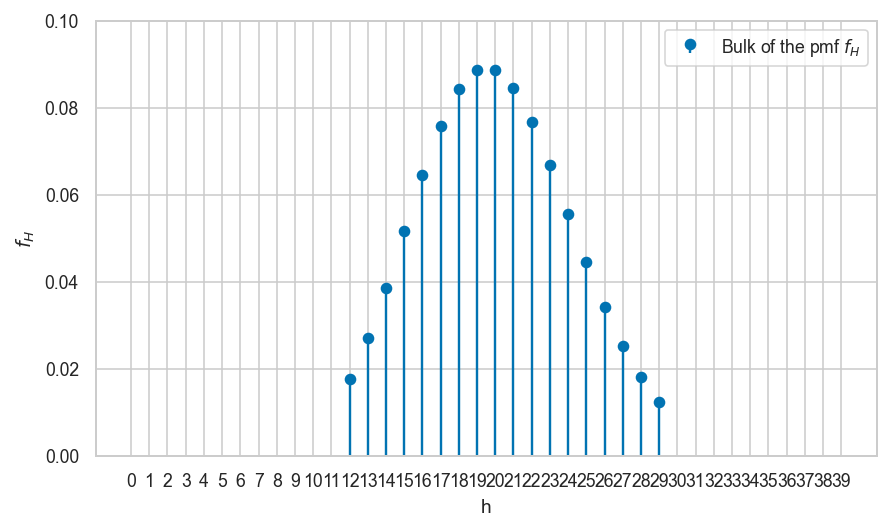

In [54]:
hs = np.arange(0, 40)
fHs = rvH.pmf(hs)

# mask all non-bulk
fHs[0:a] = np.nan
fHs[b+1:] = np.nan

fig, ax = plt.subplots()
ax.stem(fHs, label="Bulk of the pmf $f_H$", basefmt=" ")
ax.set_xlabel('h')
ax.set_ylabel('$f_H$')
ax.set_ylim([0, 0.1])
ax.legend()
plt.xticks(hs)
print("The bulk of the distibution")

### Tails of the distribution

Conversely,
the "tails" of the distribution contain the unlikely outcomes for the random variable.
The complement of the interval `I_95 = [a,b]` contains at most 5% of the probability.

#### Left tail

The left tail is the interval `[0,a-1]` which contains less than 2.5% of the probability.

In [47]:
sum([rvH.pmf(h) for h in range(0,(a-1)+1)])

0.021386821587280218

#### Right tail

The right tail is the interval `[b+1,np.inf]` which also contains less than 2.5% of the probability.

In [48]:
sum([rvH.pmf(h) for h in range(b+1,1000)])

0.0218182175255574

We can verify the combined weight of the two tails is less than 5%.

In [49]:
sum([rvH.pmf(h) for h in range(0,(a-1)+1)]) \
  + sum([rvH.pmf(h) for h in range(b+1,1000)])

0.043205039112837615

The code below generates a stem plot for tails of the distribution $f_H$,
which consists of values outside the interval `I_95`.

The tails of the distibution


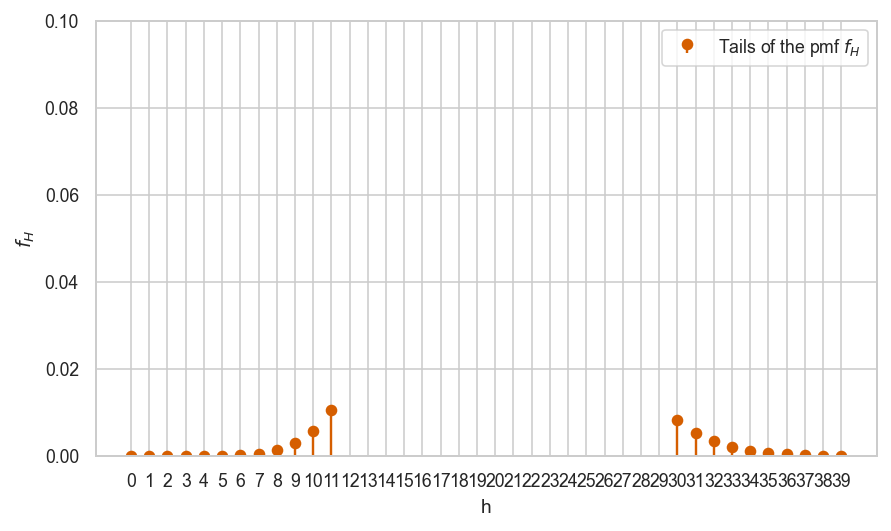

In [56]:
hs = np.arange(0, 40)
fHs = rvH.pmf(hs)

# mask the bulk of the distribution
fHs[a:b+1] = np.nan

fig, ax = plt.subplots()
ax.stem(fHs, label="Tails of the pmf $f_H$", markerfmt='ro', linefmt='r-', basefmt=" ")
ax.set_xlabel('h')
ax.set_ylabel('$f_H$')
ax.set_ylim([0, 0.1])
ax.legend()
plt.xticks(hs)
print("The tails of the distibution")